In [50]:
import kwant
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.constants import physical_constants
import tinyarray
import warnings
from scipy.sparse.linalg import eigs
import numpy as np

In [51]:
h_bar = physical_constants['Planck constant over 2 pi'][0]   
m_el = physical_constants['electron mass'][0]         
eV_unit = physical_constants['electron volt'][0]             
el_charge = physical_constants['elementary charge'][0]    
hh = physical_constants['Planck constant'][0]  
mu_B = physical_constants['Bohr magneton'][0]  
mu_B = mu_B/eV_unit

In [52]:
t = 1
delta = 1
mu = 1
L = 25
sigma_law = np.matrix([[1, 0], [0, 2]])
dx = 1

In [53]:
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])
sigma_law = np.matrix([[1, 0], [0, 2]])

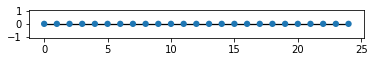

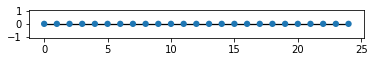

In [54]:
def make_system(mu = 0): 
    
    def onsite(site):
        x,= site.pos
        return -mu*sigma_z
            

    def shape(pos):
        x,= pos
        return 0 <= x < L 

    
    def hopping(site1, site2):
        return -t*sigma_z + 1j*sigma_y


    sys = kwant.Builder()  
    lat = kwant.lattice.chain(dx, norbs=2)
    sys[lat.shape(shape,(0,))] = onsite
    sys[lat.neighbors()] = hopping
    

    sysf = sys.finalized()

    return sysf
sysf = make_system()
kwant.plot(sysf)

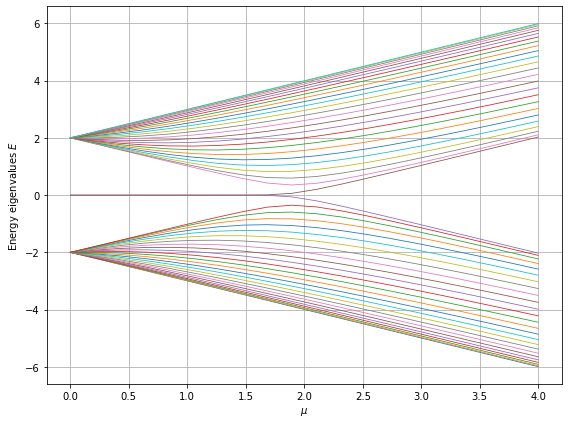

In [55]:
mu_values = np.linspace(0, 4, 20)
n_values = 50

eigvals_vs_mu = []

for mu in mu_values:
    sys = make_system(mu)
    ham_mat = sys.hamiltonian_submatrix(sparse=False)
    eigvals = np.linalg.eigh(ham_mat)[0]
    eigvals = np.sort(np.real(eigvals))  
    eigvals_vs_mu.append(eigvals[:n_values]) 

eigvals_vs_mu = np.array(eigvals_vs_mu).T  

plt.figure(figsize=(8, 6))
for i in range(n_values):
    plt.plot(mu_values, eigvals_vs_mu[i], lw=0.8)
plt.xlabel(r'$\mu$')
plt.ylabel('Energy eigenvalues $E$')
plt.grid(True)
plt.tight_layout()
plt.savefig("Rys1.png")
plt.show()

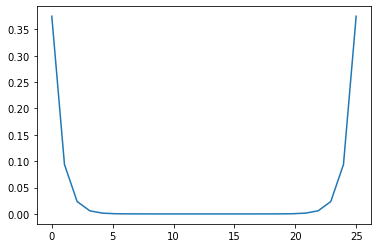

In [56]:
sysf = make_system(1)
ham_mat = sysf.hamiltonian_submatrix(sparse=False)
evals, evecs = np.linalg.eigh(ham_mat)
idx = np.argmin(np.abs(evals)) 
psi = evecs[:, idx]     
N = len(psi) // 2
prob_density = np.zeros(N)
x_table = np.linspace(0, 25, 25)
for i in range(N):
    prob_density[i] = np.abs(psi[2*i])**2 + np.abs(psi[2*i + 1])**2
plt.plot(x_table, prob_density)
plt.savefig("Rys2.png")

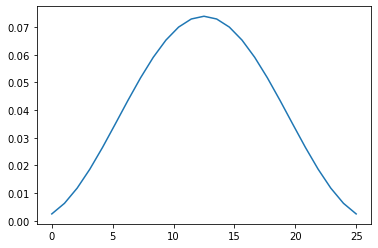

In [57]:
sysf = make_system(4)
ham_mat = sysf.hamiltonian_submatrix(sparse=False)
evals, evecs = np.linalg.eigh(ham_mat)
idx = np.argmin(np.abs(evals)) 
psi = evecs[:, idx]     
N = len(psi) // 2
prob_density = np.zeros(N)
x_table = np.linspace(0, 25, 25)
for i in range(N):
    prob_density[i] = np.abs(psi[2*i])**2 + np.abs(psi[2*i + 1])**2
plt.plot(x_table, prob_density)
plt.savefig("Rys3.png")